In [51]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)

In [3]:
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

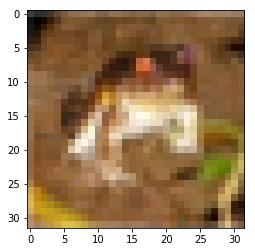

In [7]:
plt.imshow(x_img_train[0])
plt.show()

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                input_shape = (32,32,3),
                activation = 'relu',
                padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [12]:
model.add(Conv2D(filters=64,kernel_size = (3,3),
                activation = 'relu',padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())
model.add(Dropout(rate = 0.25))

In [16]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(10,activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [19]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',metrics=['accuracy'])

In [20]:
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot,
                         validation_split = 0.2,
                         epochs=10,batch_size = 128,verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 52s 1ms/step - loss: 1.5017 - acc: 0.4599 - val_loss: 1.2852 - val_acc: 0.5821
Epoch 2/10
40000/40000 [==============================] - 51s 1ms/step - loss: 1.1353 - acc: 0.5966 - val_loss: 1.1189 - val_acc: 0.6357
Epoch 3/10
40000/40000 [==============================] - 49s 1ms/step - loss: 0.9786 - acc: 0.6567 - val_loss: 1.0126 - val_acc: 0.6626
Epoch 4/10
40000/40000 [==============================] - 49s 1ms/step - loss: 0.8725 - acc: 0.6937 - val_loss: 0.9359 - val_acc: 0.6933
Epoch 5/10
40000/40000 [==============================] - 49s 1ms/step - loss: 0.7800 - acc: 0.7256 - val_loss: 0.8747 - val_acc: 0.7096
Epoch 6/10
40000/40000 [==============================] - 49s 1ms/step - loss: 0.6932 - acc: 0.7586 - val_loss: 0.8294 - val_acc: 0.7246
Epoch 7/10
40000/40000 [==============================] - 49s 1ms/step - loss: 0.6129 - acc: 0.7849 - val_loss: 0.8051 - val_acc

In [21]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
label_dict = {0:'airplane',1:"automobile",2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title += "=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

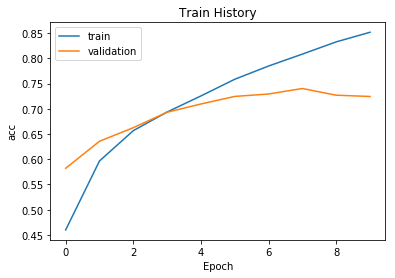

In [22]:
show_train_history(train_history,'acc','val_acc')

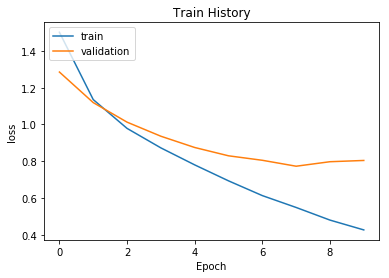

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose = 0)

In [25]:
scores

[0.8172747317314148, 0.7197]

In [26]:
prediction = model.predict_classes(x_img_test_normalize)

In [27]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

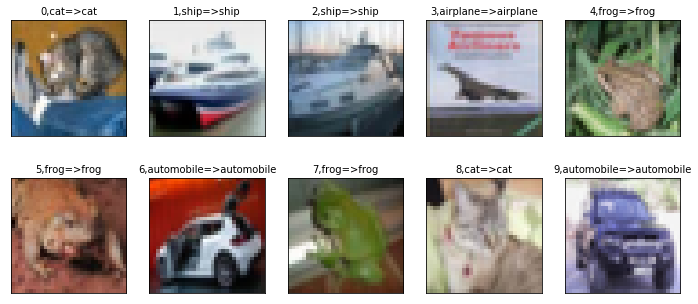

In [28]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [29]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [30]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
         'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))
        

label: cat predict: cat


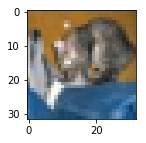

airplane Probability:0.001247063
automobile Probability:0.000635529
bird Probability:0.011296380
cat Probability:0.553966701
deer Probability:0.008651158
dog Probability:0.367032140
frog Probability:0.047517341
horse Probability:0.002777379
ship Probability:0.006502938
truck Probability:0.000373408


In [31]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

In [32]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [33]:
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,755,9,86,17,19,8,25,4,56,21
1,21,796,27,18,11,7,23,4,24,69
2,44,1,677,27,85,54,93,10,7,2
3,10,6,104,461,64,184,152,14,3,2
4,15,2,96,32,712,22,97,17,7,0
5,9,1,80,124,57,631,74,19,3,2
6,2,1,38,25,14,14,903,0,2,1
7,12,0,69,21,104,79,23,687,4,1
8,48,26,35,10,13,15,20,2,817,14


# Three layers Conv2D

In [34]:
model2 = Sequential()

In [35]:
model2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),
                  activation= 'relu',padding='same'
                 ))

In [36]:
model2.add(Dropout(0.25))

In [37]:
model2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),
                 activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
model2.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',padding='same'))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model2.add(Conv2D(filters=128,kernel_size=(3,3),
                 activation='relu',padding='same'))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=128,kernel_size=(3,3),
                 activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

In [40]:
model2.add(Flatten())
model2.add(Dropout(0.3))
model2.add(Dense(2500,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1500,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10,activation='softmax'))

In [46]:
model2.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',metrics=['accuracy'])

In [47]:
train_history = model2.fit(x_img_train_normalize,y_label_train_OneHot,
                         validation_split = 0.2,epochs=50,batch_size = 300,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 130s 3ms/step - loss: 1.9159 - acc: 0.2830 - val_loss: 1.7236 - val_acc: 0.3692
Epoch 2/50
40000/40000 [==============================] - 128s 3ms/step - loss: 1.4887 - acc: 0.4492 - val_loss: 1.3513 - val_acc: 0.5129
Epoch 3/50
40000/40000 [==============================] - 128s 3ms/step - loss: 1.2847 - acc: 0.5332 - val_loss: 1.2209 - val_acc: 0.5670
Epoch 4/50
40000/40000 [==============================] - 130s 3ms/step - loss: 1.1135 - acc: 0.6003 - val_loss: 1.0381 - val_acc: 0.6323
Epoch 5/50
40000/40000 [==============================] - 128s 3ms/step - loss: 0.9970 - acc: 0.6445 - val_loss: 0.9225 - val_acc: 0.6741
Epoch 6/50
40000/40000 [==============================] - 129s 3ms/step - loss: 0.9001 - acc: 0.6789 - val_loss: 0.8581 - val_acc: 0.7001
Epoch 7/50
40000/40000 [==============================] - 130s 3ms/step - loss: 0.8339 - acc: 0.7040 - val_loss: 0.8141 - 

In [48]:
scores = model2.evaluate(x_img_test_normalize,y_label_test_OneHot)
scores

10000/10000 [==============================] - 9s 906us/step


[0.8044833253622055, 0.7991]

In [50]:
model2.save_weights("cifar-10_cnn.h5")

In [52]:
model2.load_weights('cifar-10_cnn.h5')

In [53]:
scores = model2.evaluate(x_img_test_normalize,y_label_test_OneHot)
scores

10000/10000 [==============================] - 9s 904us/step


[0.8044833253622055, 0.7991]